In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Simulating more random data
np.random.seed(42)

In [5]:
# Increasing the dataset to 1000 entries for more variability
route_data = {
    'Route_ID': np.random.randint(1, 11, 1000),  # 10 different routes
    'Time_of_Day': np.random.choice(['Morning', 'Afternoon', 'Evening', 'Night'], 1000),
    'Day_of_Week': np.random.choice(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], 1000),
    'Passenger_Count': np.random.randint(5, 200, 1000),  # Random ridership between 5 and 200 passengers
    'Traffic_Condition': np.random.randint(1, 4, 1000),  # 1: Low traffic, 2: Medium, 3: High
    'Delay_Time': np.random.uniform(1, 20, 1000)  # Random delays between 1 and 20 minutes
}

# Creating the DataFrame
df = pd.DataFrame(route_data)

In [7]:
# Encoding categorical variables (Time_of_Day, Day_of_Week)
df['Time_of_Day'] = df['Time_of_Day'].map({'Morning': 0, 'Afternoon': 1, 'Evening': 2, 'Night': 3})
df['Day_of_Week'] = df['Day_of_Week'].map({'Mon': 0, 'Tue': 1, 'Wed': 2, 'Thu': 3, 'Fri': 4, 'Sat': 5, 'Sun': 6})


In [9]:
# Defining features (X) and target (y)
X = df[['Route_ID', 'Time_of_Day', 'Day_of_Week', 'Traffic_Condition']]
y = df['Passenger_Count']

In [11]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Applying K-Nearest Neighbors Regressor
knn = KNeighborsRegressor(n_neighbors=5)  # Using k=5 for more stability
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [15]:
# Making predictions
y_pred = knn.predict(X_test)

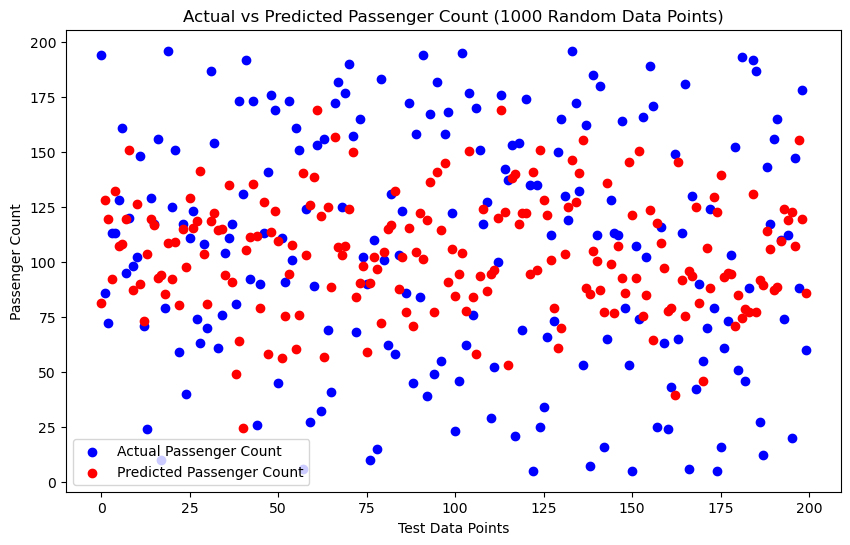

In [17]:
# Visualizing the predictions vs actual values
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Passenger Count')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Passenger Count')
plt.title('Actual vs Predicted Passenger Count (1000 Random Data Points)')
plt.xlabel('Test Data Points')
plt.ylabel('Passenger Count')
plt.legend()
plt.show()

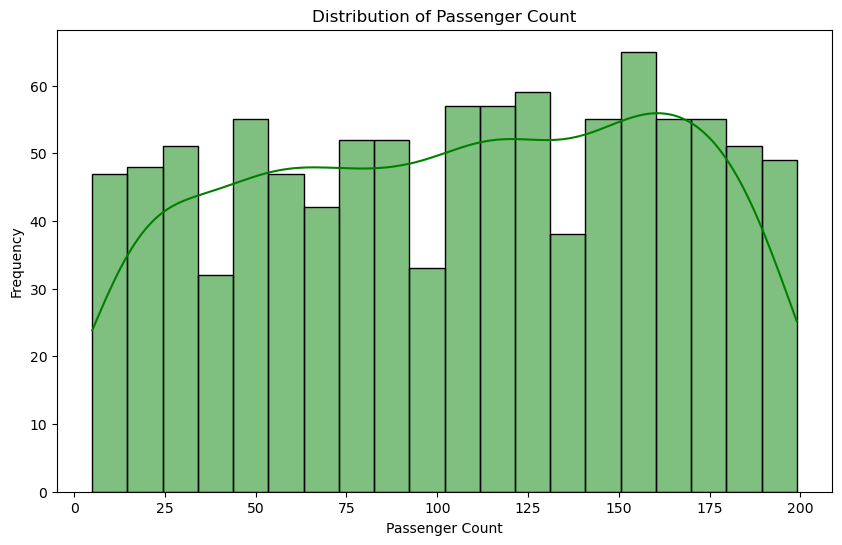

In [19]:
# Plotting Distribution of Passenger Count
plt.figure(figsize=(10,6))
sns.histplot(df['Passenger_Count'], kde=True, color='green', bins=20)
plt.title('Distribution of Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.show()

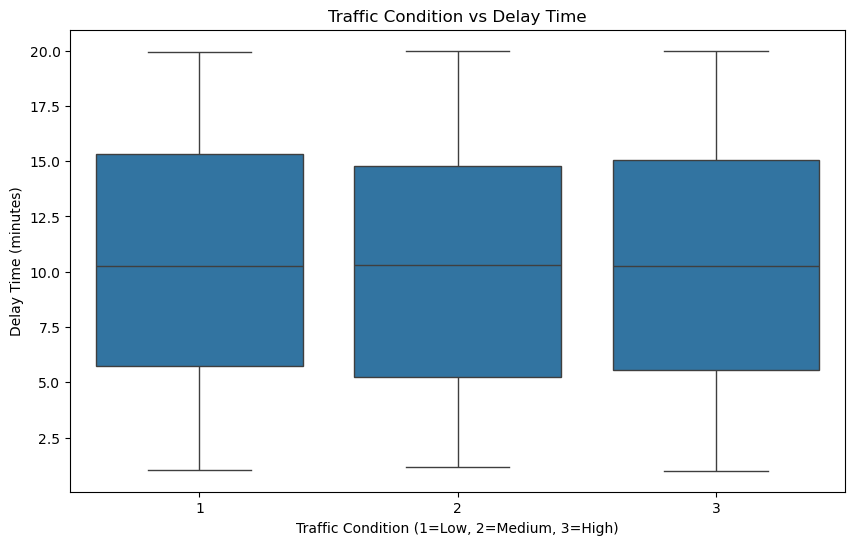

In [21]:
# Visualizing traffic conditions vs delay
plt.figure(figsize=(10,6))
sns.boxplot(x='Traffic_Condition', y='Delay_Time', data=df)
plt.title('Traffic Condition vs Delay Time')
plt.xlabel('Traffic Condition (1=Low, 2=Medium, 3=High)')
plt.ylabel('Delay Time (minutes)')
plt.show()

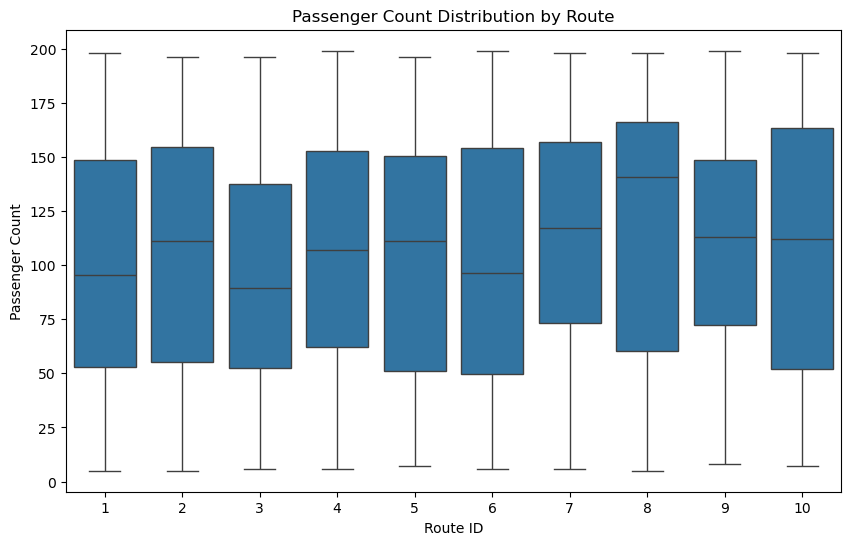

In [23]:
# Visualizing passenger count by route
plt.figure(figsize=(10,6))
sns.boxplot(x='Route_ID', y='Passenger_Count', data=df)
plt.title('Passenger Count Distribution by Route')
plt.xlabel('Route ID')
plt.ylabel('Passenger Count')
plt.show()

In [25]:
# Predicting the best route based on traffic conditions and time of day for an example
example_data = np.array([[2, 1, 3, 3]])  # Route 2, Afternoon, Thursday, High Traffic
predicted_ridership = knn.predict(example_data)
print(f"Predicted Passenger Count for Route 2 (Afternoon, Thursday, High Traffic): {predicted_ridership[0]:.2f}")

Predicted Passenger Count for Route 2 (Afternoon, Thursday, High Traffic): 82.60


C:\Users\Saba\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
